# Threshold analysis

## Data preparation

### Cloning repository

In [ ]:
!git clone https://github.com/MKasaei00/graph-edge-anomaly-detection.git -q

#### Extract files

In [ ]:
# prompt: Write a fucntion that extracts a file with the given path

import zipfile
import os

def extract_file(filepath):
  """
  Extracts a file from a zip archive.

  Args:
    filepath: The path to the zip file.
  """
  try:
    with zipfile.ZipFile(filepath, 'r') as zip_ref:
      zip_ref.extractall(os.path.dirname(filepath))
      print(f"Successfully extracted files from {filepath}")
  except FileNotFoundError:
    print(f"Error: File not found at {filepath}")
  except zipfile.BadZipFile:
    print(f"Error: Invalid zip file at {filepath}")
  except Exception as e:
    print(f"An unexpected error occurred: {e}")


extract_file('./graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.zip')
extract_file('./graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score.zip')

extract_file('./graph-edge-anomaly-detection/AnoEdge/logs/anoedge_g_darpa_logs.zip')
extract_file('./graph-edge-anomaly-detection/AnoEdge/logs/anoedge_g_iscx_logs.zip')

Successfully extracted files from ./graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.zip
Successfully extracted files from ./graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score.zip
Successfully extracted files from ./graph-edge-anomaly-detection/AnoEdge/logs/anoedge_g_darpa_logs.zip
Successfully extracted files from ./graph-edge-anomaly-detection/AnoEdge/logs/anoedge_g_iscx_logs.zip


#### Load datasets into dataframes

In [ ]:
import pandas as pd

darpa_score_df = pd.read_csv('./graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.csv', sep=' ', header=None)
darpa_sum_df = pd.read_csv('./graph-edge-anomaly-detection/AnoEdge/logs/anoedge_g_darpa_logs.csv', sep=' ', header=None)

iscx_score_df = pd.read_csv('./graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_ISCX_score.csv', sep=' ', header=None)
iscx_sum_df = pd.read_csv('./graph-edge-anomaly-detection/AnoEdge/logs/anoedge_g_iscx_logs.csv', sep=' ', header=None)

In [ ]:
darpa_df = pd.concat([darpa_score_df, darpa_sum_df], axis=1)
darpa_df.columns = ['prediction', 'label', 'sum']
iscx_df = pd.concat([iscx_score_df, iscx_sum_df], axis=1)
iscx_df.columns = ['prediction', 'label', 'sum']

In [ ]:
darpa_df.head()

,prediction,label,sum
0,1.0,0,1.00
1,2.0,0,2.00
2,1.0,0,2.80
3,2.0,0,3.80
4,1.0,0,4.42


In [ ]:
iscx_df.head()

,prediction,label,sum
0,1.0000,1,1.000
1,1.0000,0,1.900
2,1.0000,0,2.710
3,1.2226,0,3.439
4,1.5756,0,4.439


## DARPA Data analysis:

### Constant threshold analysis

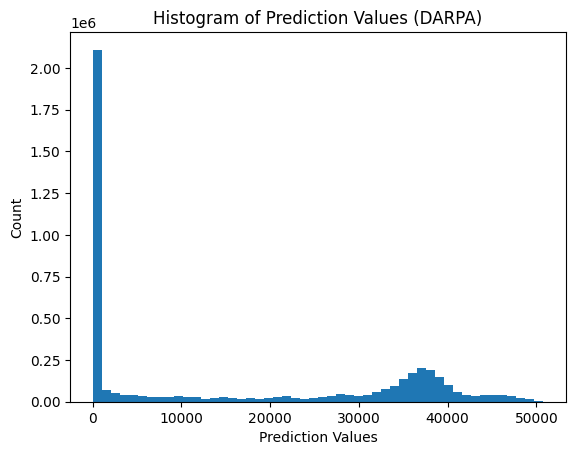

In [ ]:
# prompt: Generate a histogram that shows count of values in x axis
# and count of values in that range in the y axis

import matplotlib.pyplot as plt

# Assuming darpa_df is already loaded as in the provided code
plt.hist(darpa_df['prediction'], bins=50)  # Adjust the number of bins as needed
plt.xlabel('Prediction Values')
plt.ylabel('Count')
plt.title('Histogram of Prediction Values (DARPA)')
plt.show()

=.= 0.0 =.= 400.0 =.= 800.0 =.= 1200.0 =.= 1600.0 =.= 2000.0 =.= 2400.0 =.= 2800.0 =.= 3200.0 =.= 3600.0 =.= 4000.0 =.= 4400.0 =.= 4800.0 =.= 5200.0 =.= 5600.0 =.= 6000.0 =.= 6400.0 =.= 6800.0 =.= 7200.0 =.= 7600.0 =.= 8000.0 =.= 8400.0 =.= 8800.0 =.= 9200.0 =.= 9600.0 =.= 10000.0 =.= 10400.0 =.= 10800.0 =.= 11200.0 =.= 11600.0 =.= 12000.0 =.= 12400.0 =.= 12800.0 =.= 13200.0 =.= 13600.0 =.= 14000.0 =.= 14400.0 =.= 14800.0 =.= 15200.0 =.= 15600.0 =.= 16000.0 =.= 16400.0 =.= 16800.0 =.= 17200.0 =.= 17600.0 =.= 18000.0 =.= 18400.0 =.= 18800.0 =.= 19200.0 =.= 19600.0 =.= 20000.0 =.= 20400.0 =.= 20800.0 =.= 21200.0 =.= 21600.0 =.= 22000.0 =.= 22400.0 =.= 22800.0 =.= 23200.0 =.= 23600.0 =.= 24000.0 =.= 24400.0 =.= 24800.0 =.= 25200.0 =.= 25600.0 =.= 26000.0 =.= 26400.0 =.= 26800.0 =.= 27200.0 =.= 27600.0 =.= 28000.0 =.= 28400.0 =.= 28800.0 =.= 29200.0 =.= 29600.0 =.= 30000.0 =.= 30400.0 =.= 30800.0 =.= 31200.0 =.= 31600.0 =.= 32000.0 =.= 32400.0 =.= 32800.0 =.= 33200.0 =.= 33600.0 =.= 34000.

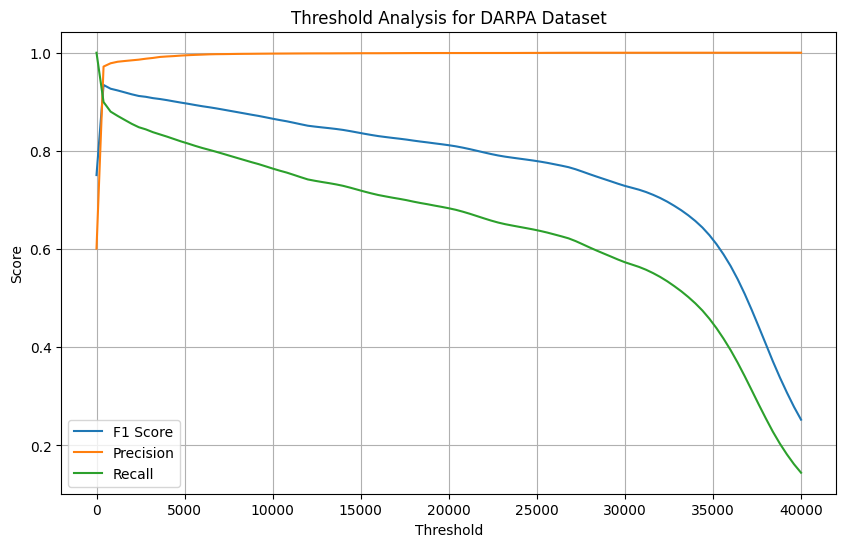

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# ... (previous code remains the same)

def bin_classification_tag(prediction, threshold):
  return 1 if prediction > threshold else 0

thresholds = np.linspace(0, 40000, 101)
f1_scores = []
precision_scores = []
recall_scores = []


for threshold in thresholds:
    darpa_df['bin_class'] = darpa_df['prediction'].apply(lambda x: bin_classification_tag(x, threshold))
    f1 = f1_score(darpa_df['label'], darpa_df['bin_class'])
    precision = precision_score(darpa_df['label'], darpa_df['bin_class'])
    recall = recall_score(darpa_df['label'], darpa_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', threshold, end=' ')


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Analysis for DARPA Dataset')
plt.legend()
plt.grid(True)
plt.show()

=.= 0.0 =.= 10.0 =.= 20.0 =.= 30.0 =.= 40.0 =.= 50.0 =.= 60.0 =.= 70.0 =.= 80.0 =.= 90.0 =.= 100.0 =.= 110.0 =.= 120.0 =.= 130.0 =.= 140.0 =.= 150.0 =.= 160.0 =.= 170.0 =.= 180.0 =.= 190.0 =.= 200.0 =.= 210.0 =.= 220.0 =.= 230.0 =.= 240.0 =.= 250.0 =.= 260.0 =.= 270.0 =.= 280.0 =.= 290.0 =.= 300.0 =.= 310.0 =.= 320.0 =.= 330.0 =.= 340.0 =.= 350.0 =.= 360.0 =.= 370.0 =.= 380.0 =.= 390.0 =.= 400.0 =.= 410.0 =.= 420.0 =.= 430.0 =.= 440.0 =.= 450.0 =.= 460.0 =.= 470.0 =.= 480.0 =.= 490.0 =.= 500.0 =.= 510.0 =.= 520.0 =.= 530.0 =.= 540.0 =.= 550.0 =.= 560.0 =.= 570.0 =.= 580.0 =.= 590.0 =.= 600.0 =.= 610.0 =.= 620.0 =.= 630.0 =.= 640.0 =.= 650.0 =.= 660.0 =.= 670.0 =.= 680.0 =.= 690.0 =.= 700.0 =.= 710.0 =.= 720.0 =.= 730.0 =.= 740.0 =.= 750.0 =.= 760.0 =.= 770.0 =.= 780.0 =.= 790.0 =.= 800.0 =.= 810.0 =.= 820.0 =.= 830.0 =.= 840.0 =.= 850.0 =.= 860.0 =.= 870.0 =.= 880.0 =.= 890.0 =.= 900.0 =.= 910.0 =.= 920.0 =.= 930.0 =.= 940.0 =.= 950.0 =.= 960.0 =.= 970.0 =.= 980.0 =.= 990.0 =.= 1000.0 

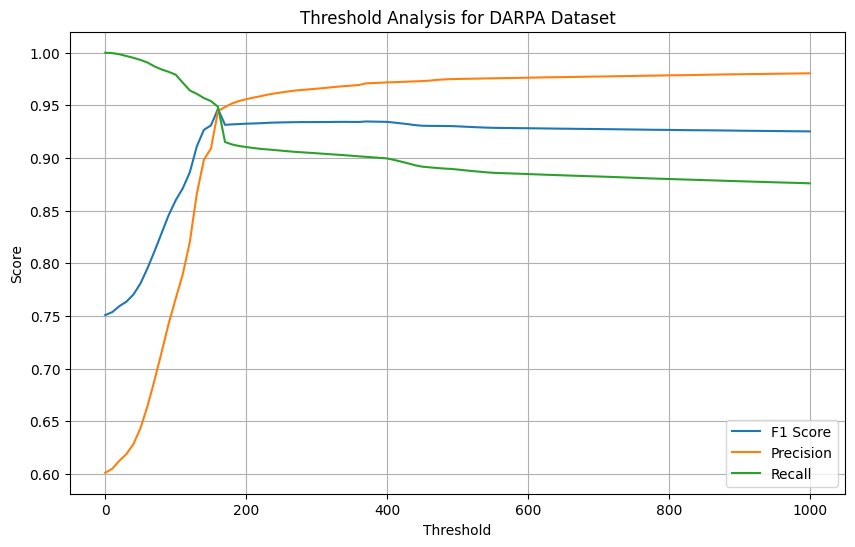

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# ... (previous code remains the same)

def bin_classification_tag(prediction, threshold):
  return 1 if prediction > threshold else 0

thresholds = np.linspace(0, 1000, 101)
f1_scores = []
precision_scores = []
recall_scores = []


for threshold in thresholds:
    darpa_df['bin_class'] = darpa_df['prediction'].apply(lambda x: bin_classification_tag(x, threshold))
    f1 = f1_score(darpa_df['label'], darpa_df['bin_class'])
    precision = precision_score(darpa_df['label'], darpa_df['bin_class'])
    recall = recall_score(darpa_df['label'], darpa_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', threshold, end=' ')


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Analysis for DARPA Dataset')
plt.legend()
plt.grid(True)
plt.show()

=.= 100.0 =.= 104.0 =.= 108.0 =.= 112.0 =.= 116.0 =.= 120.0 =.= 124.0 =.= 128.0 =.= 132.0 =.= 136.0 =.= 140.0 =.= 144.0 =.= 148.0 =.= 152.0 =.= 156.0 =.= 160.0 =.= 164.0 =.= 168.0 =.= 172.0 =.= 176.0 =.= 180.0 =.= 184.0 =.= 188.0 =.= 192.0 =.= 196.0 =.= 200.0 

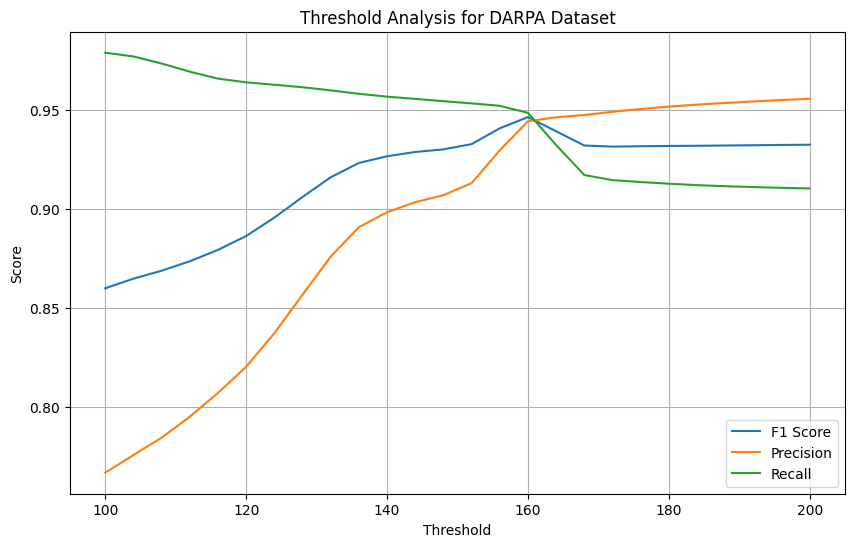

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# ... (previous code remains the same)

def bin_classification_tag(prediction, threshold):
  return 1 if prediction > threshold else 0

thresholds = np.linspace(100, 200, 26)
f1_scores = []
precision_scores = []
recall_scores = []


for threshold in thresholds:
    darpa_df['bin_class'] = darpa_df['prediction'].apply(lambda x: bin_classification_tag(x, threshold))
    f1 = f1_score(darpa_df['label'], darpa_df['bin_class'])
    precision = precision_score(darpa_df['label'], darpa_df['bin_class'])
    recall = recall_score(darpa_df['label'], darpa_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', threshold, end=' ')


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Analysis for DARPA Dataset')
plt.legend()
plt.grid(True)
plt.show()

Based on above figure best possible f1 score when threshold is constant is about 0.95

### Dynamic threshold value based on sum of matrix

In this process we try to find the threshold through out the algorithm process automatically and be able to tag items zero or one

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

def bin_classification_tag(row):
  """
  Classifies a row as 1 or 0 based on prediction, sum, label(we are not using label here).

  Args:
    row: A row from the DataFrame containing 'prediction' and 'sum' columns.

  Returns:
    1 if prediction is greater than sum value
    otherwise 0.
  """
  return 1 if row['prediction'] > row['sum'] else 0

darpa_df['bin_class'] = darpa_df.apply(lambda row: bin_classification_tag(row), axis=1)
f1 = f1_score(darpa_df['label'], darpa_df['bin_class'])
precision = precision_score(darpa_df['label'], darpa_df['bin_class'])
recall = recall_score(darpa_df['label'], darpa_df['bin_class'])

print('Threshold is sum value')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Threshold is sum value
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


It is not working because it has can not classify items well

In the next cell we try sqrt(sum)

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

def bin_classification_tag(row):
  """
  Classifies a row as 1 or 0 based on prediction, sum, label(we are not using label here).

  Args:
    row: A row from the DataFrame containing 'prediction' and 'sum' columns.

  Returns:
    1 if prediction is greater than sqrt of sum value
    otherwise 0.
  """
  return 1 if row['prediction'] > np.sqrt(row['sum']) else 0

darpa_df['bin_class'] = darpa_df.apply(lambda row: bin_classification_tag(row), axis=1)
f1 = f1_score(darpa_df['label'], darpa_df['bin_class'])
precision = precision_score(darpa_df['label'], darpa_df['bin_class'])
recall = recall_score(darpa_df['label'], darpa_df['bin_class'])

print('Threshold is sum value')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

Threshold is sum value
F1 Score: 0.7560475859671578
Precision: 0.6079354657370035
Recall: 0.9995754799870964


We try to make it better now have 10*sqrt(sum)

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

def bin_classification_tag(row):
  """
  Classifies a row as 1 or 0 based on prediction, sum, label(we are not using label here).

  Args:
    row: A row from the DataFrame containing 'prediction' and 'sum' columns.

  Returns:
    1 if prediction is greater than sqrt of sum value
    otherwise 0.
  """
  return 1 if row['prediction'] > 10 * np.sqrt(row['sum']) else 0

darpa_df['bin_class'] = darpa_df.apply(lambda row: bin_classification_tag(row), axis=1)
f1 = f1_score(darpa_df['label'], darpa_df['bin_class'])
precision = precision_score(darpa_df['label'], darpa_df['bin_class'])
recall = recall_score(darpa_df['label'], darpa_df['bin_class'])

print('Threshold is sum value')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

Threshold is sum value
F1 Score: 0.931186381349445
Precision: 0.9680279913266312
Recall: 0.8970462248224378


Based on previous result we understand that assuming the value of threshold for every step equal to prediction > 10*sqrt(sum) works well

After this step I want to evaluate a wide range of values between 0 and 20 for the multiplier so that I can see is there any better value than can enhance my algorithm performance.

The following plot of f1, precision and recall shows the info

=.= 0.0 =.= 2.0 =.= 4.0 =.= 6.0 =.= 8.0 =.= 10.0 =.= 12.0 =.= 14.0 =.= 16.0 =.= 18.0 =.= 20.0 

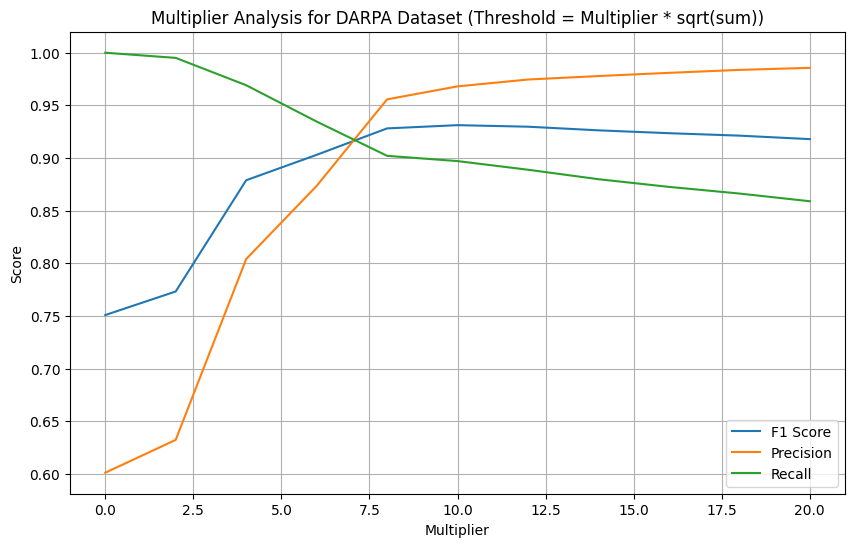

In [ ]:
# prompt: Generate code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

def bin_classification_tag(row, multiplier):
    return 1 if row['prediction'] > multiplier * np.sqrt(row['sum']) else 0

multipliers = np.linspace(0, 20, 11)
f1_scores = []
precision_scores = []
recall_scores = []

for multiplier in multipliers:
    darpa_df['bin_class'] = darpa_df.apply(lambda row: bin_classification_tag(row, multiplier), axis=1)
    f1 = f1_score(darpa_df['label'], darpa_df['bin_class'])
    precision = precision_score(darpa_df['label'], darpa_df['bin_class'])
    recall = recall_score(darpa_df['label'], darpa_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', multiplier, end=' ')

plt.figure(figsize=(10, 6))
plt.plot(multipliers, f1_scores, label='F1 Score')
plt.plot(multipliers, precision_scores, label='Precision')
plt.plot(multipliers, recall_scores, label='Recall')

plt.xlabel('Multiplier')
plt.ylabel('Score')
plt.title('Multiplier Analysis for DARPA Dataset (Threshold = Multiplier * sqrt(sum))')
plt.legend()
plt.grid(True)
plt.show()

Now I will investigate values between 6 and 15 by 0.5 step

=.= 6.0 =.= 6.5 =.= 7.0 =.= 7.5 =.= 8.0 =.= 8.5 =.= 9.0 =.= 9.5 =.= 10.0 =.= 10.5 =.= 11.0 =.= 11.5 =.= 12.0 =.= 13.0 =.= 13.5 =.= 14.0 =.= 14.5 =.= 15.0 

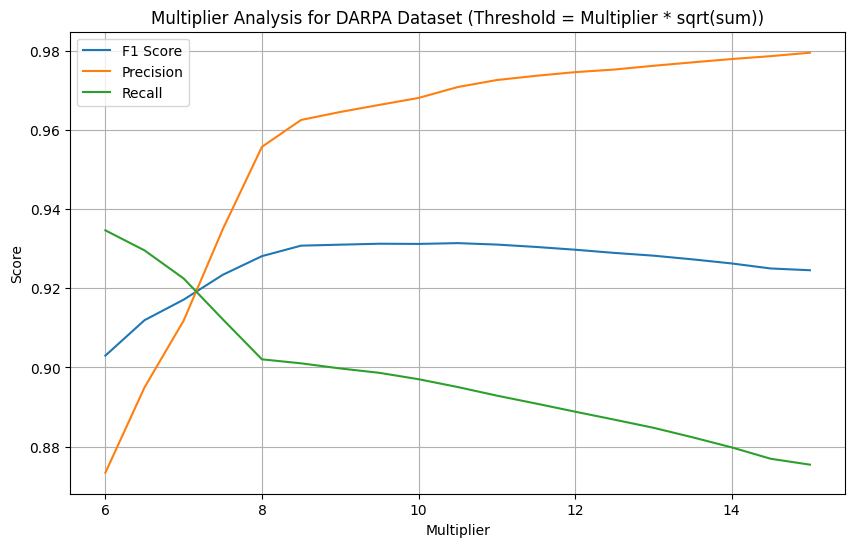

In [46]:
# prompt: Generate code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

def bin_classification_tag(row, multiplier):
    return 1 if row['prediction'] > multiplier * np.sqrt(row['sum']) else 0

multipliers = np.linspace(6, 15, 19)
f1_scores = []
precision_scores = []
recall_scores = []

for multiplier in multipliers:
    darpa_df['bin_class'] = darpa_df.apply(lambda row: bin_classification_tag(row, multiplier), axis=1)
    f1 = f1_score(darpa_df['label'], darpa_df['bin_class'])
    precision = precision_score(darpa_df['label'], darpa_df['bin_class'])
    recall = recall_score(darpa_df['label'], darpa_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', multiplier, end=' ')

plt.figure(figsize=(10, 6))
plt.plot(multipliers, f1_scores, label='F1 Score')
plt.plot(multipliers, precision_scores, label='Precision')
plt.plot(multipliers, recall_scores, label='Recall')

plt.xlabel('Multiplier')
plt.ylabel('Score')
plt.title('Multiplier Analysis for DARPA Dataset (Threshold = Multiplier * sqrt(sum))')
plt.legend()
plt.grid(True)
plt.show()

From the previous chart I can understand that it has a good value around 10

## ISCX Data analysis

### Constant threshold analysis

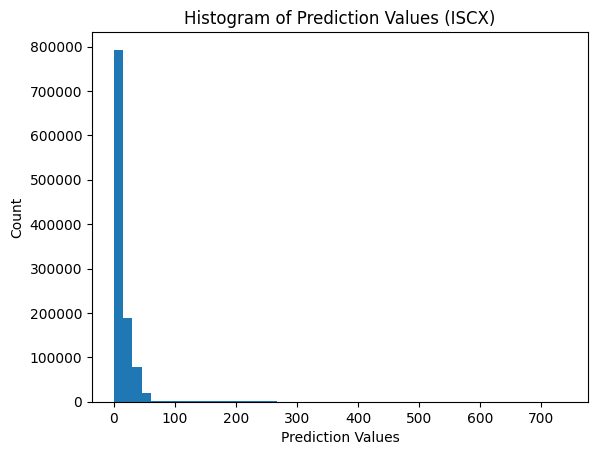

In [ ]:
# prompt: Generate a histogram that shows count of values in x axis
# and count of values in that range in the y axis

import matplotlib.pyplot as plt

# Assuming iscx_df is already loaded as in the provided code
plt.hist(iscx_df['prediction'], bins=50)  # Adjust the number of bins as needed
plt.xlabel('Prediction Values')
plt.ylabel('Count')
plt.title('Histogram of Prediction Values (ISCX)')
plt.show()

=.= 0.0 =.= 10.0 =.= 20.0 =.= 30.0 =.= 40.0 =.= 50.0 =.= 60.0 =.= 70.0 =.= 80.0 =.= 90.0 =.= 100.0 =.= 110.0 =.= 120.0 =.= 130.0 =.= 140.0 =.= 150.0 =.= 160.0 =.= 170.0 =.= 180.0 =.= 190.0 =.= 200.0 =.= 210.0 =.= 220.0 =.= 230.0 =.= 240.0 =.= 250.0 =.= 260.0 =.= 270.0 =.= 280.0 =.= 290.0 =.= 300.0 =.= 310.0 =.= 320.0 =.= 330.0 =.= 340.0 =.= 350.0 =.= 360.0 =.= 370.0 =.= 380.0 =.= 390.0 =.= 400.0 =.= 410.0 =.= 420.0 =.= 430.0 =.= 440.0 =.= 450.0 =.= 460.0 =.= 470.0 =.= 480.0 =.= 490.0 =.= 500.0 

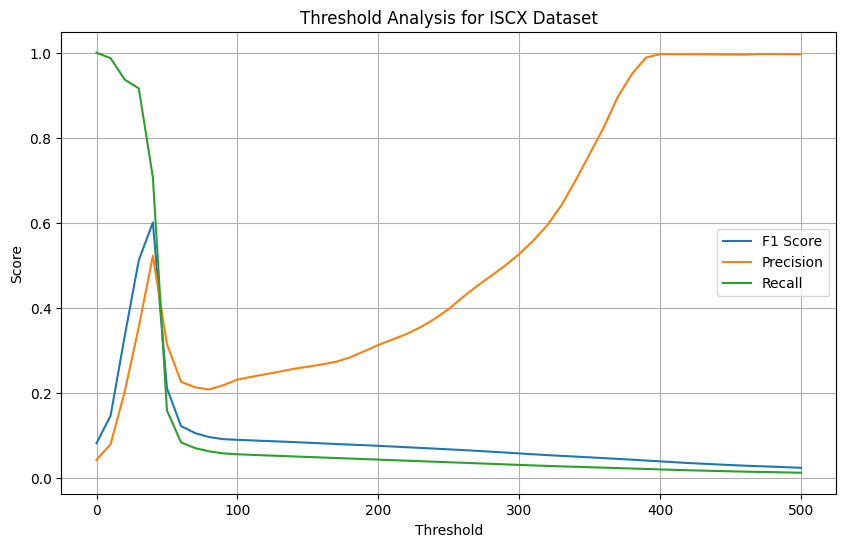

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# ... (previous code remains the same)

def bin_classification_tag(prediction, threshold):
  return 1 if prediction > threshold else 0

thresholds = np.linspace(0, 500, 51)
f1_scores = []
precision_scores = []
recall_scores = []


for threshold in thresholds:
    iscx_df['bin_class'] = iscx_df['prediction'].apply(lambda x: bin_classification_tag(x, threshold))
    f1 = f1_score(iscx_df['label'], iscx_df['bin_class'])
    precision = precision_score(iscx_df['label'], iscx_df['bin_class'])
    recall = recall_score(iscx_df['label'], iscx_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', threshold, end=' ')


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Analysis for ISCX Dataset')
plt.legend()
plt.grid(True)
plt.show()

Based on prev visualization perfect value is between 0 and 150

Now we investigate more

=.= 0.0 =.= 2.0 =.= 4.0 =.= 6.0 =.= 8.0 =.= 10.0 =.= 12.0 =.= 14.0 =.= 16.0 =.= 18.0 =.= 20.0 =.= 22.0 =.= 24.0 =.= 26.0 =.= 28.0 =.= 30.0 =.= 32.0 =.= 34.0 =.= 36.0 =.= 38.0 =.= 40.0 =.= 42.0 =.= 44.0 =.= 46.0 =.= 48.0 =.= 50.0 =.= 52.0 =.= 54.0 =.= 56.0 =.= 58.0 =.= 60.0 =.= 62.0 =.= 64.0 =.= 66.0 =.= 68.0 =.= 70.0 =.= 72.0 =.= 74.0 =.= 76.0 =.= 78.0 =.= 80.0 =.= 82.0 =.= 84.0 =.= 86.0 =.= 88.0 =.= 90.0 =.= 92.0 =.= 94.0 =.= 96.0 =.= 98.0 =.= 100.0 

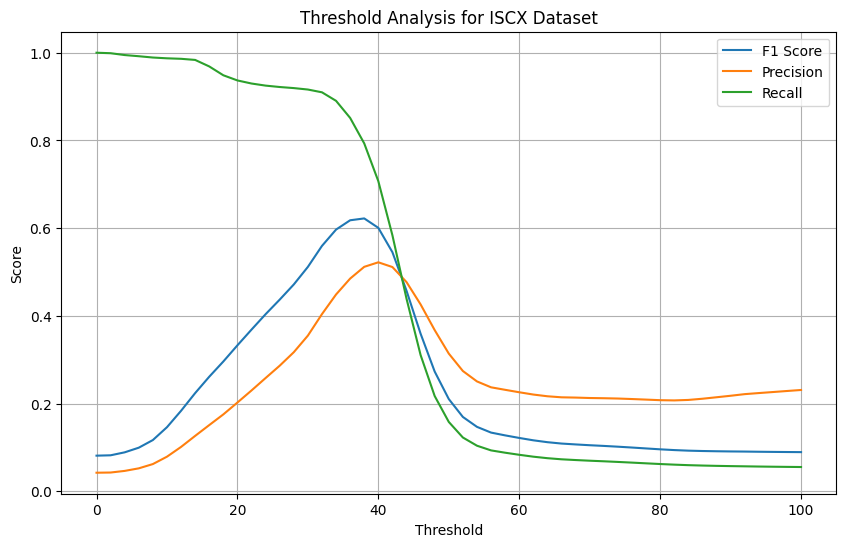

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# ... (previous code remains the same)

def bin_classification_tag(prediction, threshold):
  return 1 if prediction > threshold else 0

thresholds = np.linspace(0, 100, 51)
f1_scores = []
precision_scores = []
recall_scores = []


for threshold in thresholds:
    iscx_df['bin_class'] = iscx_df['prediction'].apply(lambda x: bin_classification_tag(x, threshold))
    f1 = f1_score(iscx_df['label'], iscx_df['bin_class'])
    precision = precision_score(iscx_df['label'], iscx_df['bin_class'])
    recall = recall_score(iscx_df['label'], iscx_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', threshold, end=' ')


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Analysis for ISCX Dataset')
plt.legend()
plt.grid(True)
plt.show()

=.= 25.0 =.= 25.5 =.= 26.0 =.= 26.5 =.= 27.0 =.= 27.5 =.= 28.0 =.= 28.5 =.= 29.0 =.= 29.5 =.= 30.0 =.= 30.5 =.= 31.0 =.= 31.5 =.= 32.0 =.= 32.5 =.= 33.0 =.= 33.5 =.= 34.0 =.= 34.5 =.= 35.0 =.= 35.5 =.= 36.0 =.= 36.5 =.= 37.0 =.= 37.5 =.= 38.0 =.= 38.5 =.= 39.0 =.= 39.5 =.= 40.0 =.= 40.5 =.= 41.0 =.= 41.5 =.= 42.0 =.= 42.5 =.= 43.0 =.= 43.5 =.= 44.0 =.= 44.5 =.= 45.0 =.= 45.5 =.= 46.0 =.= 46.5 =.= 47.0 =.= 47.5 =.= 48.0 =.= 48.5 =.= 49.0 =.= 49.5 =.= 50.0 

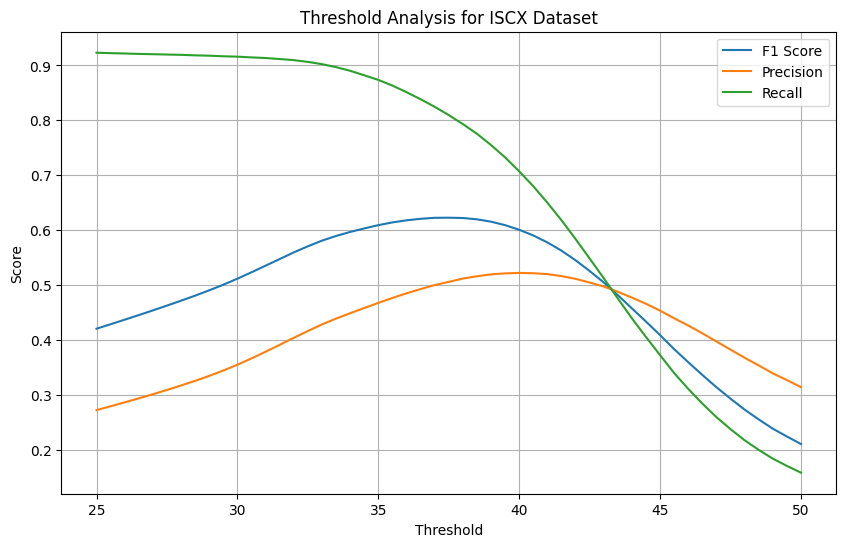

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# ... (previous code remains the same)

def bin_classification_tag(prediction, threshold):
  return 1 if prediction > threshold else 0

thresholds = np.linspace(25, 50, 51)
f1_scores = []
precision_scores = []
recall_scores = []


for threshold in thresholds:
    iscx_df['bin_class'] = iscx_df['prediction'].apply(lambda x: bin_classification_tag(x, threshold))
    f1 = f1_score(iscx_df['label'], iscx_df['bin_class'])
    precision = precision_score(iscx_df['label'], iscx_df['bin_class'])
    recall = recall_score(iscx_df['label'], iscx_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', threshold, end=' ')


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Analysis for ISCX Dataset')
plt.legend()
plt.grid(True)
plt.show()

From above graph we understand that F1 score is the best when threshold constant value is equal to about 37.5 value


To continue I try to make this value better in dynamic threshold value

### Dynamic threshold value based on sum of matrix

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

def bin_classification_tag(row):
  """
  Classifies a row as 1 or 0 based on prediction, sum, label(we are not using label here).

  Args:
    row: A row from the DataFrame containing 'prediction' and 'sum' columns.

  Returns:
    1 if prediction is greater than sum value
    otherwise 0.
  """
  return 1 if row['prediction'] > row['sum'] else 0

iscx_df['bin_class'] = iscx_df.apply(lambda row: bin_classification_tag(row), axis=1)
f1 = f1_score(iscx_df['label'], iscx_df['bin_class'])
precision = precision_score(iscx_df['label'], iscx_df['bin_class'])
recall = recall_score(iscx_df['label'], iscx_df['bin_class'])

print('Threshold is sum value')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Threshold is sum value
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


Like the Darpa algorithm it is not working

In the next cell we try sqrt(sum)

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

def bin_classification_tag(row):
  """
  Classifies a row as 1 or 0 based on prediction, sum, label(we are not using label here).

  Args:
    row: A row from the DataFrame containing 'prediction' and 'sum' columns.

  Returns:
    1 if prediction is greater than sqrt of sum value
    otherwise 0.
  """
  return 1 if row['prediction'] > np.sqrt(row['sum']) else 0

iscx_df['bin_class'] = iscx_df.apply(lambda row: bin_classification_tag(row), axis=1)
f1 = f1_score(iscx_df['label'], iscx_df['bin_class'])
precision = precision_score(iscx_df['label'], iscx_df['bin_class'])
recall = recall_score(iscx_df['label'], iscx_df['bin_class'])

print('Threshold is sum value')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

Threshold is sum value
F1 Score: 0.13750406909548113
Precision: 0.07387689217073742
Recall: 0.9910883416566213


It is classifying but the accuracy is very low

Try this 10*sqrt(sum)

In [ ]:
# prompt: Calcaluate every possible threshold select 100 uniformly from 0 to 40000
# for every threshold value calculate bin_classification_tag if prediction is greater than threshold one otherswise zero
# Draw a line plot like this
# x axis is threshold value
# y axis has multiple lines
# F1 score, Precision , recall

def bin_classification_tag(row):
  """
  Classifies a row as 1 or 0 based on prediction, sum, label(we are not using label here).

  Args:
    row: A row from the DataFrame containing 'prediction' and 'sum' columns.

  Returns:
    1 if prediction is greater than sqrt of sum value
    otherwise 0.
  """
  return 1 if row['prediction'] > 10*np.sqrt(row['sum']) else 0

iscx_df['bin_class'] = iscx_df.apply(lambda row: bin_classification_tag(row), axis=1)
f1 = f1_score(iscx_df['label'], iscx_df['bin_class'])
precision = precision_score(iscx_df['label'], iscx_df['bin_class'])
recall = recall_score(iscx_df['label'], iscx_df['bin_class'])

print('Threshold is sum value')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

Threshold is sum value
F1 Score: 0.08310769740841023
Precision: 0.28793873643905554
Recall: 0.04856208024797658


It is not working too

Next step I will try to make 10 a parameter and then try different values between 0 and 20 to evaluate

=.= 0.0 =.= 1.0 =.= 2.0 =.= 3.0 =.= 4.0 =.= 5.0 =.= 6.0 =.= 7.0 =.= 8.0 =.= 9.0 =.= 10.0 =.= 11.0 =.= 12.0 =.= 13.0 =.= 14.0 =.= 15.0 =.= 16.0 =.= 17.0 =.= 18.0 =.= 19.0 =.= 20.0 

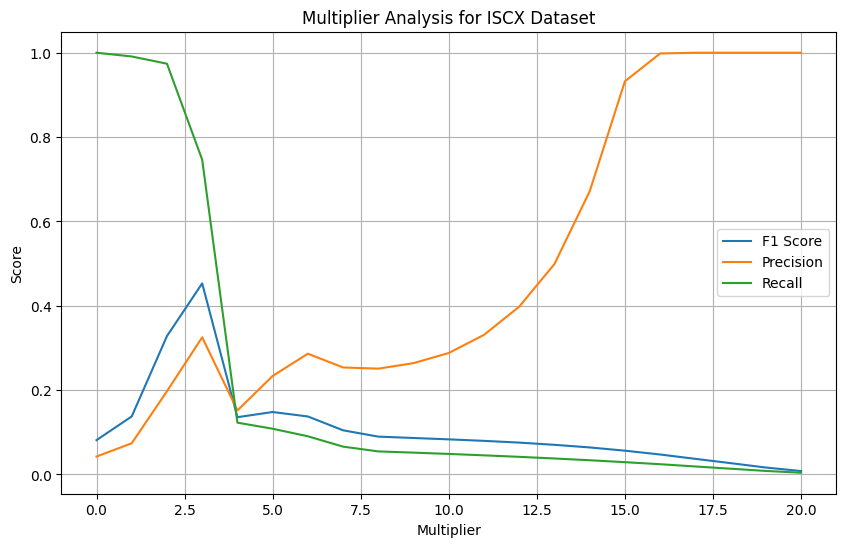

In [ ]:
# prompt: Generate some code

def bin_classification_tag(row, multiplier):
  """
  Classifies a row as 1 or 0 based on prediction, sum, and a multiplier.

  Args:
    row: A row from the DataFrame.
    multiplier: A multiplier for the square root of the sum.

  Returns:
    1 if prediction is greater than multiplier * sqrt(sum), otherwise 0.
  """
  return 1 if row['prediction'] > multiplier * np.sqrt(row['sum']) else 0

multipliers = np.linspace(0, 20, 21)
f1_scores = []
precision_scores = []
recall_scores = []

for multiplier in multipliers:
    iscx_df['bin_class'] = iscx_df.apply(lambda row: bin_classification_tag(row, multiplier), axis=1)
    f1 = f1_score(iscx_df['label'], iscx_df['bin_class'])
    precision = precision_score(iscx_df['label'], iscx_df['bin_class'])
    recall = recall_score(iscx_df['label'], iscx_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', multiplier, end=' ')

plt.figure(figsize=(10, 6))
plt.plot(multipliers, f1_scores, label='F1 Score')
plt.plot(multipliers, precision_scores, label='Precision')
plt.plot(multipliers, recall_scores, label='Recall')

plt.xlabel('Multiplier')
plt.ylabel('Score')
plt.title('Multiplier Analysis for ISCX Dataset')
plt.legend()
plt.grid(True)
plt.show()

I understand that from 0 to 5 is intersting and I will discover more values in this area

=.= 0.0 =.= 0.25 =.= 0.5 =.= 0.75 =.= 1.0 =.= 1.25 =.= 1.5 =.= 1.75 =.= 2.0 =.= 2.25 =.= 2.5 =.= 2.75 =.= 3.0 =.= 3.25 =.= 3.5 =.= 3.75 =.= 4.0 =.= 4.25 =.= 4.5 =.= 4.75 =.= 5.0 

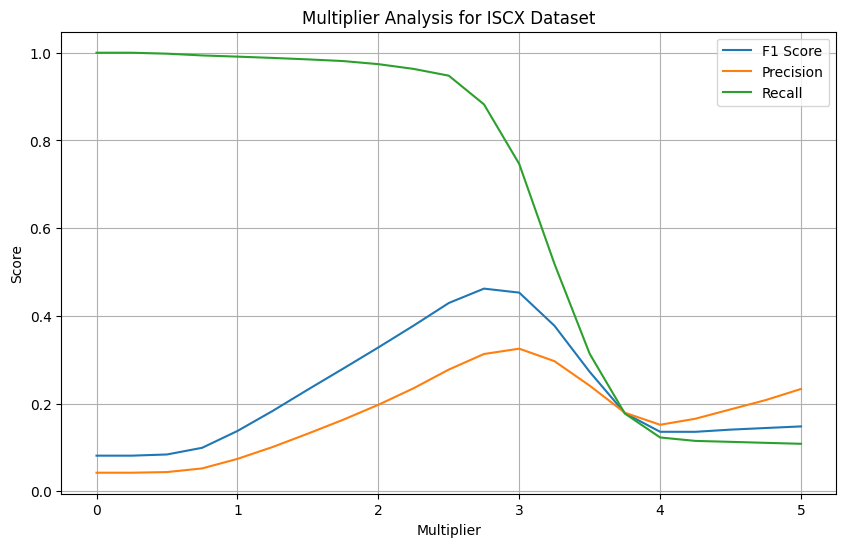

In [ ]:
# prompt: Generate some code

def bin_classification_tag(row, multiplier):
  """
  Classifies a row as 1 or 0 based on prediction, sum, and a multiplier.

  Args:
    row: A row from the DataFrame.
    multiplier: A multiplier for the square root of the sum.

  Returns:
    1 if prediction is greater than multiplier * sqrt(sum), otherwise 0.
  """
  return 1 if row['prediction'] > multiplier * np.sqrt(row['sum']) else 0

multipliers = np.linspace(0, 5, 21)
f1_scores = []
precision_scores = []
recall_scores = []

for multiplier in multipliers:
    iscx_df['bin_class'] = iscx_df.apply(lambda row: bin_classification_tag(row, multiplier), axis=1)
    f1 = f1_score(iscx_df['label'], iscx_df['bin_class'])
    precision = precision_score(iscx_df['label'], iscx_df['bin_class'])
    recall = recall_score(iscx_df['label'], iscx_df['bin_class'])

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    print('=.=', multiplier, end=' ')

plt.figure(figsize=(10, 6))
plt.plot(multipliers, f1_scores, label='F1 Score')
plt.plot(multipliers, precision_scores, label='Precision')
plt.plot(multipliers, recall_scores, label='Recall')

plt.xlabel('Multiplier')
plt.ylabel('Score')
plt.title('Multiplier Analysis for ISCX Dataset')
plt.legend()
plt.grid(True)
plt.show()